In [1]:
source(file.path("../../src/00.0_init.R"))

Joining, by = "species"



In [2]:
wd <- file.path(analysis_dir, "validation", "03_WGBS", "03.5_RRBS_test_in_WGBS")

setwd(wd)

In [3]:
summary_files = list.files(pattern = "auc_test", recursive = TRUE)

In [4]:
length(summary_files)

[1] 360

In [5]:
summary_auc_list <- sapply(summary_files, fread, simplify = F)

In [6]:
summary_auc <- rbindlist(summary_auc_list)

In [7]:
head(summary_auc)

type,auc,ifRand,AUC_train,species_train
<chr>,<dbl>,<chr>,<dbl>,<chr>
Mus_musculus,0.6131550,noRandTest,0.700509,AB
Gallus_gallus,0.7407010,noRandTest,0.700509,AB
Phascolarctos_cinereus,0.7396960,noRandTest,0.700509,AB
Bos_taurus,0.6271619,noRandTest,0.700509,AB
Danio_rerio_GSE134055,0.5294790,noRandTest,0.700509,AB
Branchiostoma_lanceolatum,0.4509150,noRandTest,0.700509,AB


In [8]:
summary_auc[type == "Danio_rerio_GSE134055", type:="Danio_rerio",]

In [9]:
summary_auc$type <- gsub("_", " ", summary_auc$type)

In [10]:
summary_auc <- left_join(summary_auc, sp_df, by=c("species_train" = "species"))

In [11]:
summary_auc_mean <- summary_auc %>% group_by(type, group) %>% summarize(mean_auc = mean(auc), sd_auc = sd(auc))

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



In [30]:
WGBS_species_order <- c('Branchiostoma lanceolatum','Danio rerio','Xenopus laevis', 'Gallus gallus', 'Phascolarctos cinereus', 'Mus musculus','Bos taurus')

In [12]:
head(summary_auc_mean)

type,group,mean_auc,sd_auc
<chr>,<fct>,<dbl>,<dbl>
Bos taurus,Inv.,0.5194465,0.08294770
Bos taurus,Ch.,0.5147317,0.03631276
Bos taurus,Act.,0.5421877,0.05044239
Bos taurus,Amp.,0.5185869,0.03125744
Bos taurus,Rep.,0.5991677,0.04239508
Bos taurus,Av.,0.6185522,0.02882072


In [31]:
summary_auc_mean$type <- factor(summary_auc_mean$type, levels = WGBS_species_order)

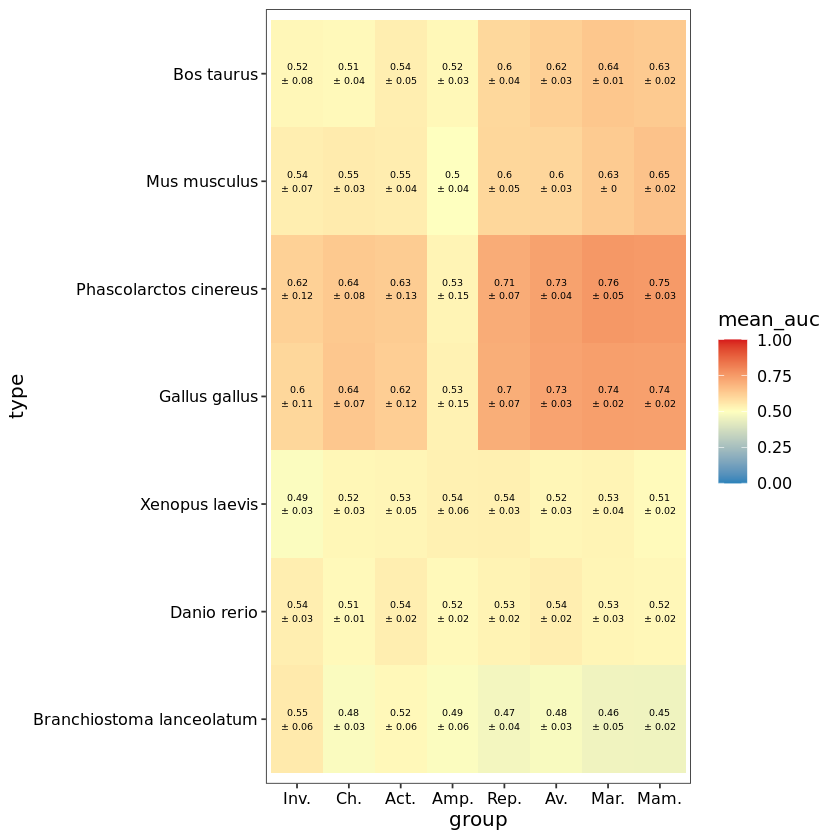

In [52]:
p <- ggplot(summary_auc_mean, aes(x = group, y = type, fill = mean_auc)) + 
geom_tile() +  
scale_fill_gradient2(limits = c(0,1), low = "#2b83ba",mid ="#ffffbf",  high ="#d7191c", midpoint = 0.5 ) + 
geom_text(aes(label = paste0(round(mean_auc,2), "\n± ", round(sd_auc,2))), size = 2)
p

In [56]:
ggsave("WGBS_RRBS_summary_heatmap.pdf", p, width = 6, height = 4)

In [45]:
summary_auc_mean_mtx <- summary_auc_mean[,-4] %>% pivot_wider(names_from = type, values_from = mean_auc)

In [46]:
summary_auc_mean_mtx <- as.data.frame(summary_auc_mean_mtx)
row.names(summary_auc_mean_mtx) <- summary_auc_mean_mtx$group
summary_auc_mean_mtx <- summary_auc_mean_mtx[,-1]

In [48]:
colnames(summary_auc_mean_mtx)

[1] "Bos taurus"                "Branchiostoma lanceolatum"
[3] "Danio rerio"               "Gallus gallus"            
[5] "Mus musculus"              "Phascolarctos cinereus"   
[7] "Xenopus laevis"

In [49]:
summary_auc_mean_mtx

,Bos taurus,Branchiostoma lanceolatum,Danio rerio,Gallus gallus,Mus musculus,Phascolarctos cinereus,Xenopus laevis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Inv.,0.5194465,0.5540582,0.5424530,0.6009474,0.5424074,0.6150134,0.4877542
Ch.,0.5147317,0.4849520,0.5140789,0.6401824,0.5502075,0.6355075,0.5212461
Act.,0.5421877,0.5175145,0.5423247,0.6223997,0.5462244,0.6285723,0.5261961
Amp.,0.5185869,0.4871570,0.5152277,0.5334495,0.4982608,0.5266942,0.5353211
Rep.,0.5991677,0.4662593,0.5304470,0.7037608,0.6012985,0.7091614,0.5389486
Av.,0.6185522,0.4808005,0.5426384,0.7295345,0.6031286,0.7337999,0.5222043
Mar.,0.6413606,0.4558400,0.5251125,0.7410340,0.6303965,0.7586445,0.5269630
Mam.,0.6333175,0.4532390,0.5193151,0.7370077,0.6526000,0.7521401,0.5118411


In [50]:
annot_row <- unique(sp_df[color_class!="Jawless_vertebrate", c("group", "color_class")])

In [51]:
annot_row

group,color_class
<fct>,<fct>
Inv.,Invertebrata
Ch.,Chondrichthyes
Act.,Actinopteri
Amp.,Amphibia
Rep.,Reptilia
Av.,Aves
Mar.,Marsupialia
Mam.,Mammalia


In [52]:
annot_row <- as.data.frame(annot_row)
row.names(annot_row) <- annot_row$group
annot_row <- annot_row[, -1, drop = FALSE]

In [53]:
summary_auc_mean_mtx

,Bos taurus,Branchiostoma lanceolatum,Danio rerio,Gallus gallus,Mus musculus,Phascolarctos cinereus,Xenopus laevis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Inv.,0.5194465,0.5540582,0.5424530,0.6009474,0.5424074,0.6150134,0.4877542
Ch.,0.5147317,0.4849520,0.5140789,0.6401824,0.5502075,0.6355075,0.5212461
Act.,0.5421877,0.5175145,0.5423247,0.6223997,0.5462244,0.6285723,0.5261961
Amp.,0.5185869,0.4871570,0.5152277,0.5334495,0.4982608,0.5266942,0.5353211
Rep.,0.5991677,0.4662593,0.5304470,0.7037608,0.6012985,0.7091614,0.5389486
Av.,0.6185522,0.4808005,0.5426384,0.7295345,0.6031286,0.7337999,0.5222043
Mar.,0.6413606,0.4558400,0.5251125,0.7410340,0.6303965,0.7586445,0.5269630
Mam.,0.6333175,0.4532390,0.5193151,0.7370077,0.6526000,0.7521401,0.5118411


In [54]:
WGBS_species_order

[1] "Branchiostoma lanceolatum" "Danio rerio"              
[3] "Xenopus laevis"            "Gallus gallus"            
[5] "Phascolarctos cinereus"    "Mus musculus"             
[7] "Bos taurus"

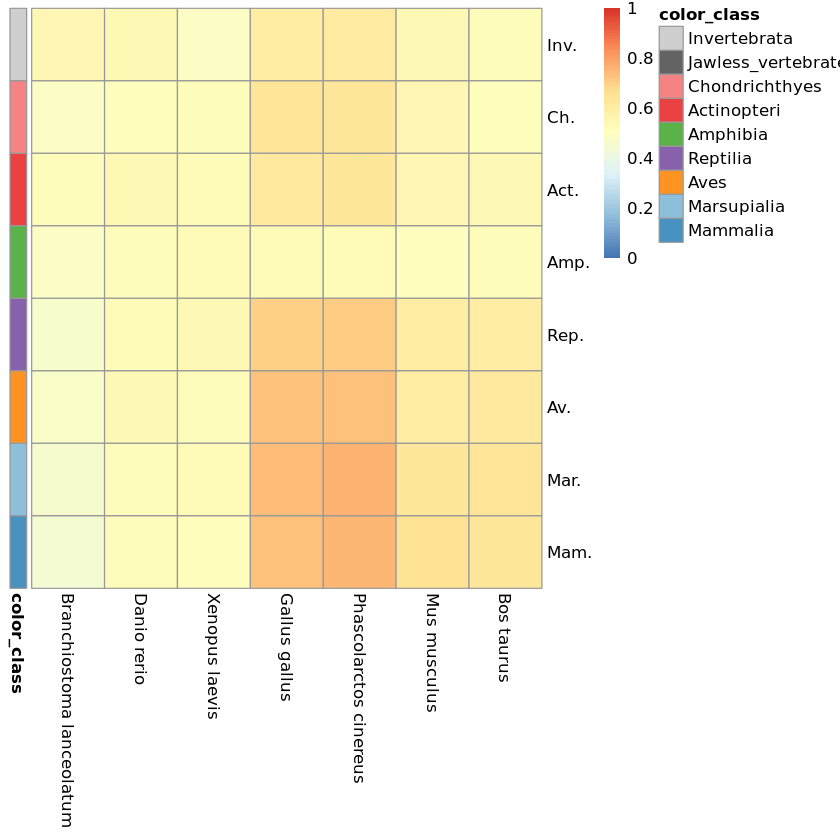

In [57]:
p <- pheatmap(summary_auc_mean_mtx[, WGBS_species_order], 
         cluster_rows = FALSE, 
        fontsize = 10,
         cluster_cols = FALSE, annotation_row = annot_row,
         breaks = seq(0, 1, length.out = 100),
         annotation_colors = list(color_class = class_colors))

In [58]:
dev.off()

null device 
          1

In [36]:
ggsave("summary_heatmap.pdf", p, width = 6, height = 4)

In [25]:
### without the grouping

In [24]:
summary_auc_wide <- summary_auc[,c("type", "species_train", "auc")] %>% pivot_wider(names_from = type, values_from = auc)

In [25]:
head(summary_auc_wide)

species_train,Mus musculus,Gallus gallus,Phascolarctos cinereus,Bos taurus,Danio rerio,Branchiostoma lanceolatum,Xenopus laevis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AB,0.613155,0.740701,0.739696,0.6271619,0.529479,0.450915,0.515733
ABB,0.646579,0.734388,0.733022,0.6571951,0.544481,0.466700,0.489827
ABU,0.546910,0.728503,0.730327,0.5753678,0.525490,0.441101,0.548769
AC,0.615763,0.760033,0.751638,0.6290350,0.563765,0.512578,0.535019
ACO,0.526838,0.387854,0.371549,0.5092427,0.552966,0.608229,0.476260
ACT,0.494192,0.396431,0.385999,0.5322331,0.505170,0.522128,0.479355


In [26]:
summary_auc_wide <- as.data.frame(summary_auc_wide)
row.names(summary_auc_wide) <- summary_auc_wide$species_train
summary_auc_wide <- summary_auc_wide[,-1]

In [27]:
annot_row <- as.data.frame(sp_df[species %in% summary_auc$species_train, -3])

In [28]:
row.names(annot_row) <- annot_row$species

In [29]:
annot_row <- annot_row[, -1, drop = FALSE]

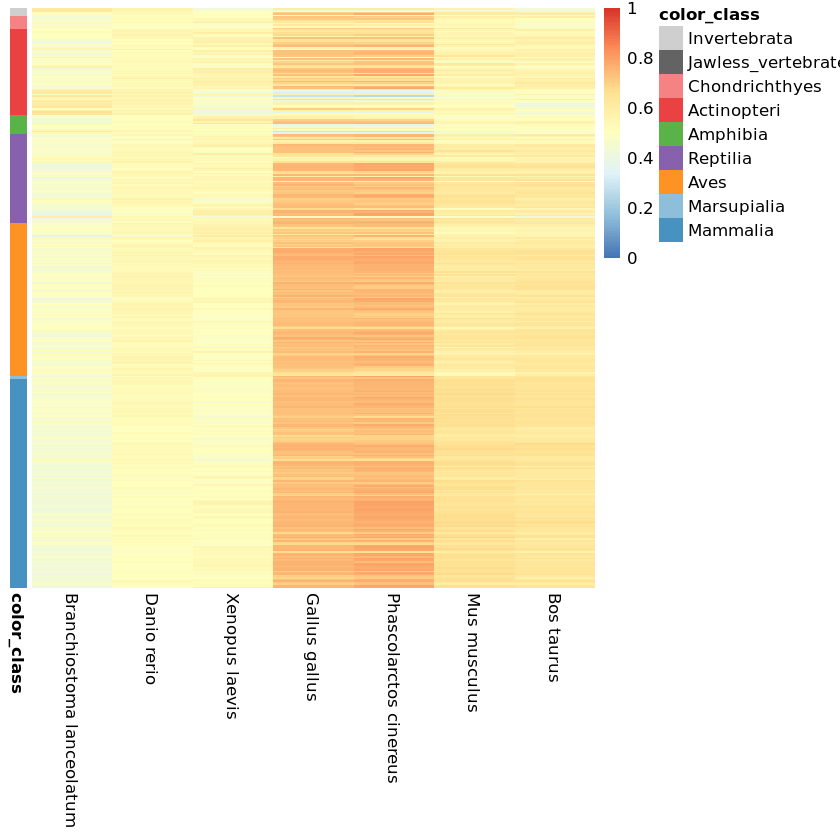

In [31]:
p <- pheatmap(summary_auc_wide[row.names(annot_row), WGBS_species_order], 
         cluster_rows = FALSE, 
         cluster_cols = FALSE, annotation_row = annot_row,
         show_rownames = F,
         annotation_colors = list(color_class = class_colors), 
        breaks = seq(0, 1, length.out = 100))